<h1><center>Industry Application of Analytics </center></h1>

![](https://media.giphy.com/media/3oKIPEqDGUULpEU0aQ/giphy.gif)

# Topics
1. Introduction to Business Analytics. 
2. Basic Statistics 
3. Exploratory Data Analysis with pandas
4. Data Visualization with Seaborn (optional) 
5. Modelling with python:- 
    - Regression 
        - Linear Regression 
    - Classification
        - Logistic Regression (We meet again !)
        - Decision Tree <------------------------------------------------ **This is where we are**
    - Analysing our models
6. Churn Analysis
7. Social Media Analytics
    - Web Scraping
8. Marketing Analytics (maybe !)
9. Time Series Forecasting (maybe maybe !!)
10. Supply Chain Analytics (maybe maybe maybe !!!)

# Decision Tree Regressor

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv('datasets/decision_tree_regressor_data1.csv')
df2 = pd.read_csv('datasets/decision_tree_regressor_data2.csv')

In [3]:
df

,Outlook,Temperature,Humidity,Windy,Hours Played
0,Rainy,Hot,High,False,26
1,Rainy,Hot,High,True,30
2,Overcast,Hot,High,False,48
3,Sunny,Mild,High,False,46
4,Sunny,Cool,Normal,False,52
5,Sunny,Cool,Normal,True,23
6,Overcast,Cool,Normal,True,43
7,Rainy,Mild,High,False,36
8,Rainy,Cool,Normal,False,38
9,Sunny,Mild,Normal,False,48


In [ ]:
df2

,Temperature,Hours Played
0,52,26
1,30,30
2,24,48
3,33,46
4,44,52
5,41,23
6,39,43
7,37,36
8,26,38
9,48,48


# Let's look at data 1 

In [5]:
df.columns

Index(['Outlook', 'Temperature', 'Humidity', 'Windy', 'Hours Played'], dtype='object')

In [6]:
X = df[['Outlook', 'Temperature', 'Humidity', 'Windy']]

In [7]:
y = df['Hours Played']

In [8]:
X

,Outlook,Temperature,Humidity,Windy
0,Rainy,Hot,High,False
1,Rainy,Hot,High,True
2,Overcast,Hot,High,False
3,Sunny,Mild,High,False
4,Sunny,Cool,Normal,False
5,Sunny,Cool,Normal,True
6,Overcast,Cool,Normal,True
7,Rainy,Mild,High,False
8,Rainy,Cool,Normal,False
9,Sunny,Mild,Normal,False


In [9]:
y

0     26
1     30
2     48
3     46
4     52
5     23
6     43
7     36
8     38
9     48
10    48
11    62
12    44
13    30
Name: Hours Played, dtype: int64

# Decision Tree

In [10]:
# Importing model
from sklearn.tree import DecisionTreeRegressor

In [11]:
# Initialising Model
clf = DecisionTreeRegressor()

In [12]:
# Fitting model
clf = clf.fit(X, y)

ValueError: could not convert string to float: 'Rainy'

# We have to encode !!

### One Hot Encoding

In [12]:
X_encoded = pd.get_dummies(X)

In [13]:
# Initialising Model
clf = DecisionTreeRegressor(min_samples_split=3)

In [14]:
# Fitting model
clf = clf.fit(X_encoded, y)

In [15]:
# My Model has been trained
clf

DecisionTreeRegressor(min_samples_split=3)

# Plotting the decision tree

In [16]:
from sklearn import tree

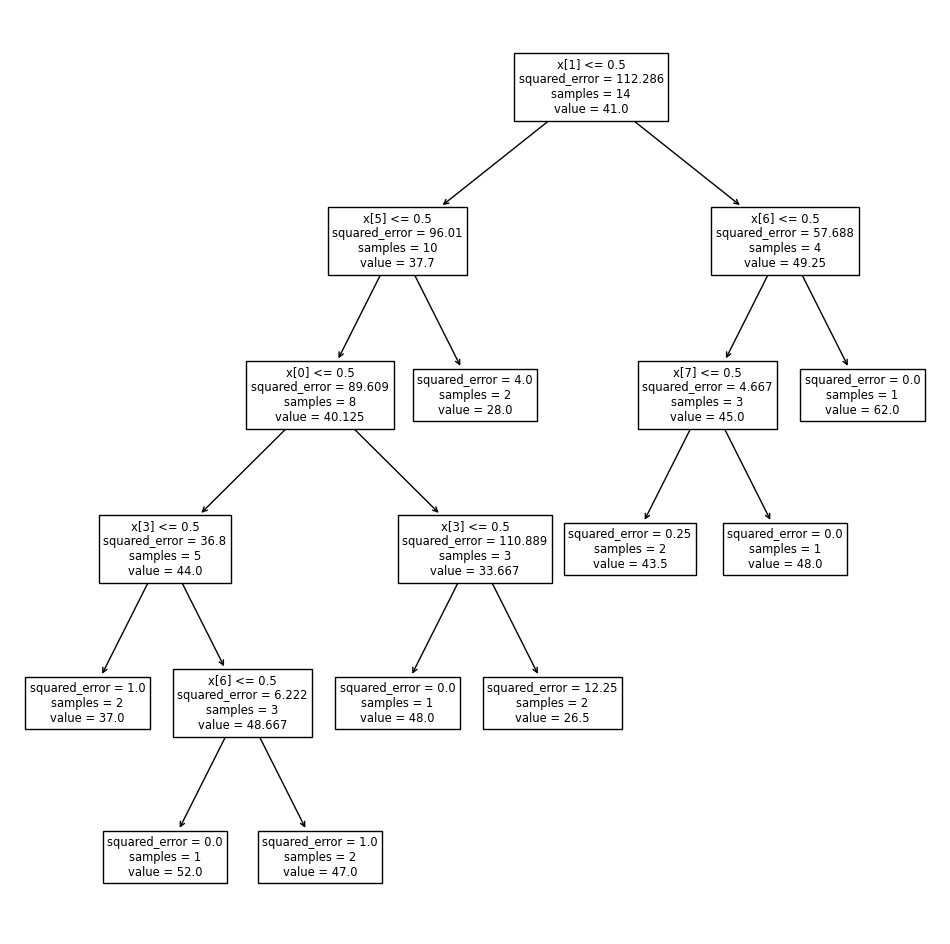

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
tree.plot_tree(clf)
plt.show()

# If You want column names

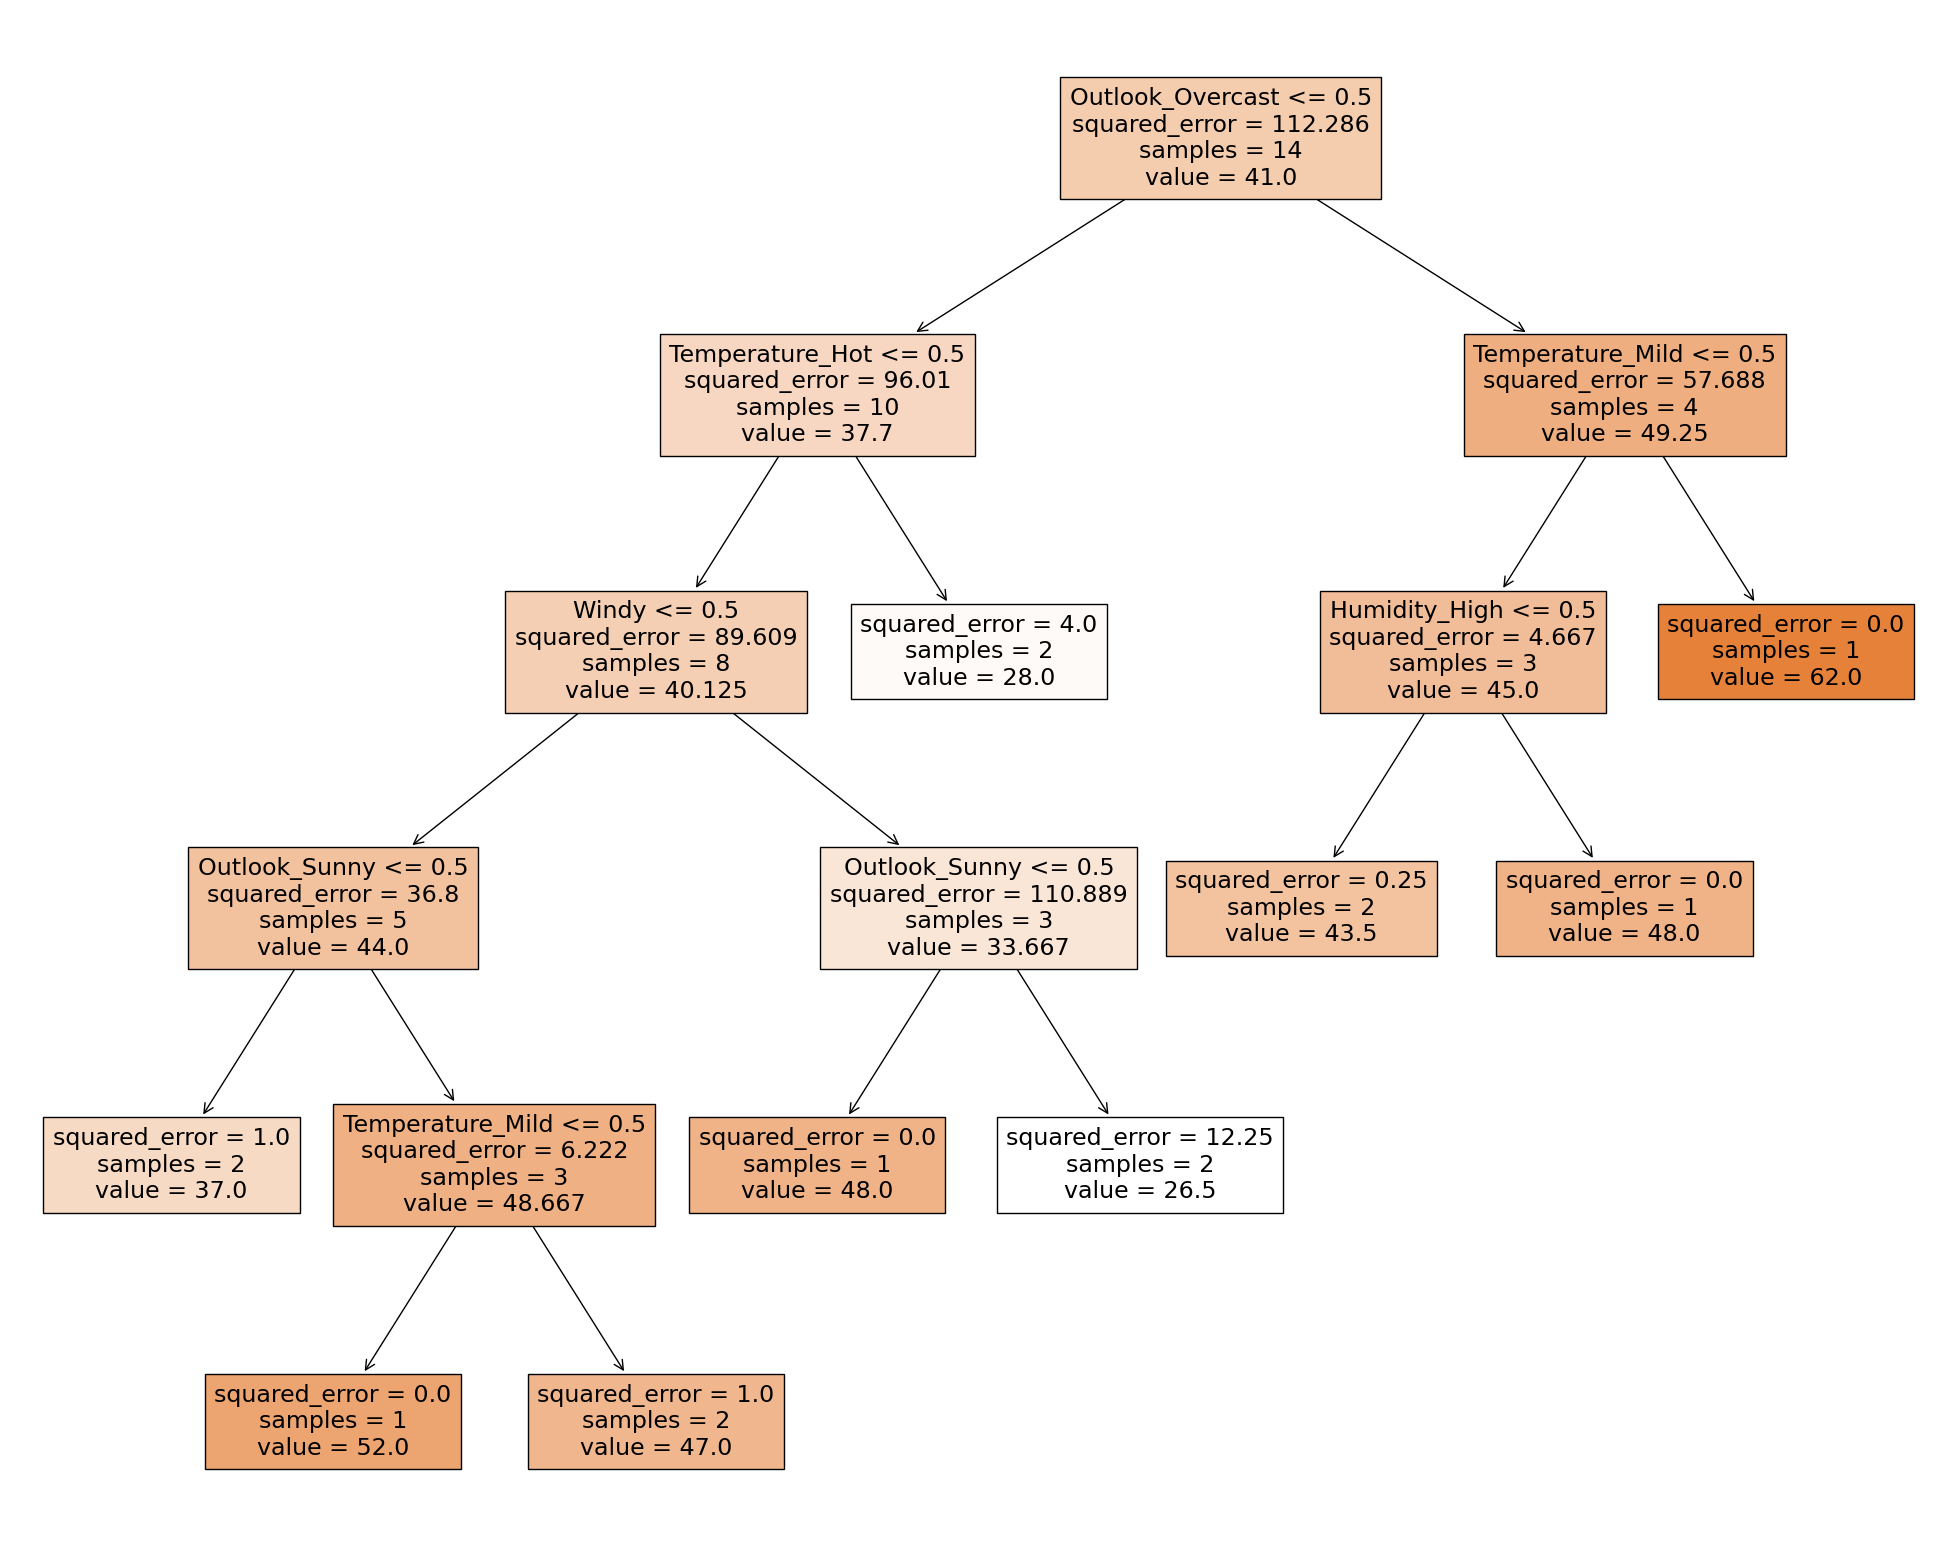

In [18]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=X_encoded.columns, filled=True)

In [20]:
X_encoded

,Windy,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal
0,False,0,1,0,0,1,0,1,0
1,True,0,1,0,0,1,0,1,0
2,False,1,0,0,0,1,0,1,0
3,False,0,0,1,0,0,1,1,0
4,False,0,0,1,1,0,0,0,1
5,True,0,0,1,1,0,0,0,1
6,True,1,0,0,1,0,0,0,1
7,False,0,1,0,0,0,1,1,0
8,False,0,1,0,1,0,0,0,1
9,False,0,0,1,0,0,1,0,1


In [21]:
clf.feature_importances_

array([0.13042888, 0.24830619, 0.        , 0.30716612, 0.        ,
       0.15324104, 0.15206298, 0.00879479, 0.        ])

### Label Encoder 
Dont' do this, unless you know what you are doing.

In [44]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [45]:
le.fit(df['Outlook'])

LabelEncoder()

In [46]:
le.transform(df['Outlook'])

array([1, 1, 0, 2, 2, 2, 0, 1, 1, 2, 1, 0, 0, 2])

In [47]:
le.transform(['Sunny'])

array([2])

In [48]:
col_list = ['Outlook', 'Temperature', 'Humidity', 'Windy']

In [49]:
for i in col_list:
    df[i] = le.fit_transform(df[i])

In [50]:
df

,Outlook,Temperature,Humidity,Windy,Hours Played
0,1,1,0,0,26
1,1,1,0,1,30
2,0,1,0,0,48
3,2,2,0,0,46
4,2,0,1,0,52
5,2,0,1,1,23
6,0,0,1,1,43
7,1,2,0,0,36
8,1,0,1,0,38
9,2,2,1,0,48


In [51]:
X = df[['Outlook', 'Temperature', 'Humidity', 'Windy']]

In [52]:
y = df['Hours Played']

In [53]:
X

In [54]:
y

In [55]:
clf = DecisionTreeRegressor()

In [56]:
clf = clf.fit(X, y)

In [57]:
clf

In [58]:
X

# Plotting the decision tree

In [59]:
from sklearn import tree
tree.plot_tree(clf)

# Too small !!

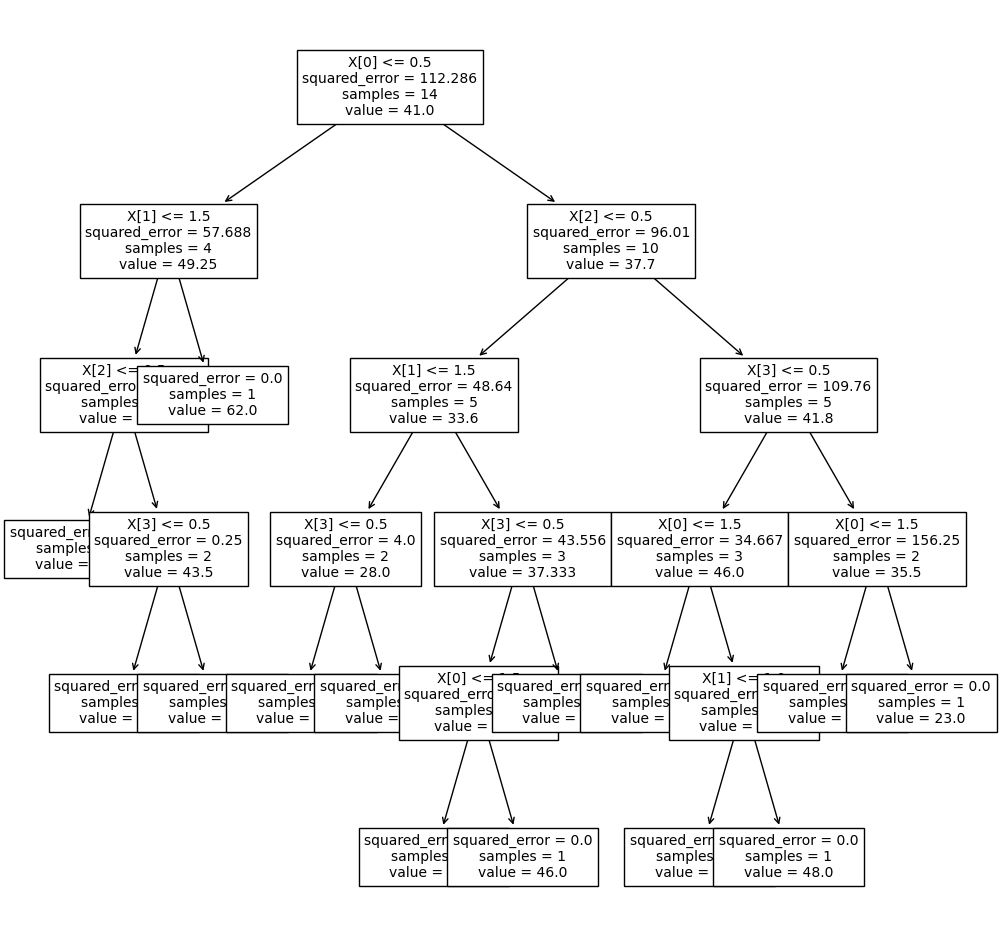

In [38]:
# plot tree
import matplotlib.pyplot as plt


plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=10)
plt.show()

# Dataset 2

In [4]:
df2

,Temperature,Hours Played
0,52,26
1,30,30
2,24,48
3,33,46
4,44,52
5,41,23
6,39,43
7,37,36
8,26,38
9,48,48


In [5]:
X = df2[['Temperature']]
y = df['Hours Played']

In [6]:
clf2 = DecisionTreeRegressor()

In [7]:
clf2 = clf2.fit(X, y)

In [8]:
clf2

DecisionTreeRegressor()

In [9]:
X

,Temperature
0,52
1,30
2,24
3,33
4,44
5,41
6,39
7,37
8,26
9,48


# Plotting the decision tree

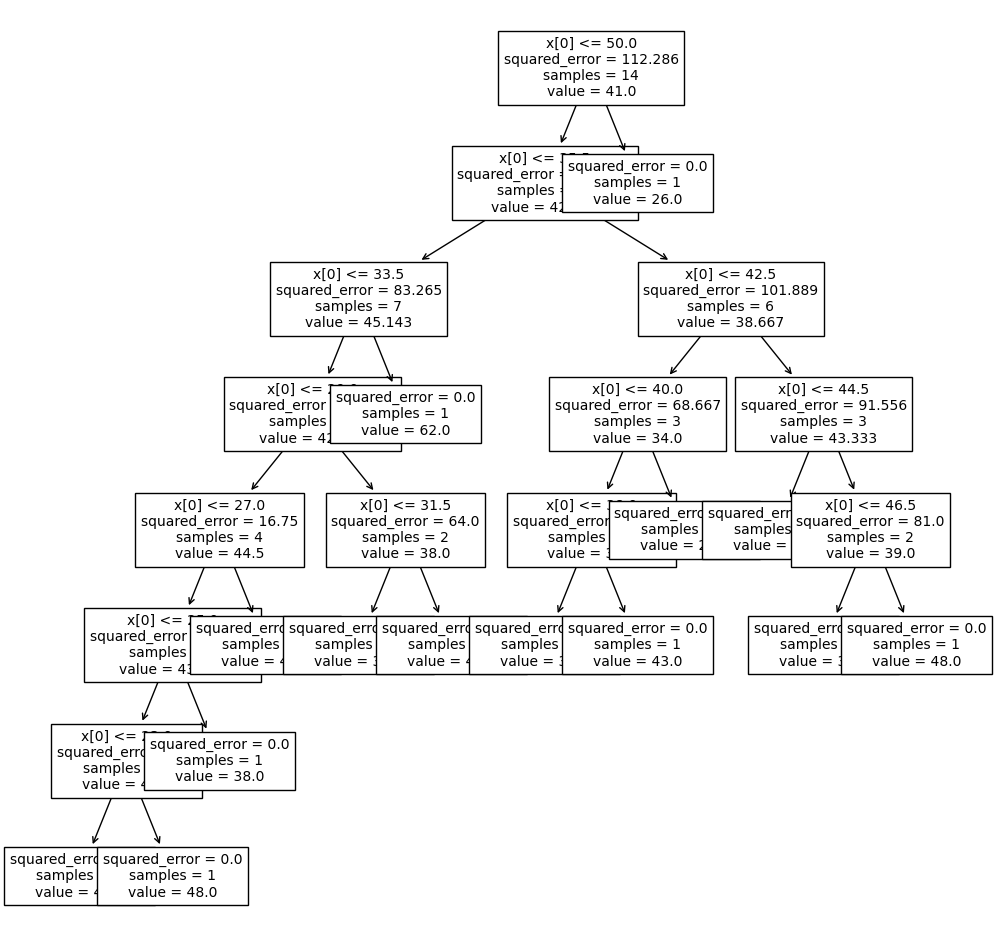

In [11]:
# plot tree
import matplotlib.pyplot as plt


plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(clf2, fontsize=10)
plt.show()

# Too small !!

In [12]:
X

,Temperature
0,52
1,30
2,24
3,33
4,44
5,41
6,39
7,37
8,26
9,48
